## AFL-2 Responsi


*   Angel Aprilia Putri Lo (0706022210003)
*   Kezia Elice Yulianto (0706022210006)



### Import Library

Import the necessary libraries

In [38]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch
from datetime import datetime

### Load Dataset  
The dataset that we will use is a **Customer Personality Analysis Dataset**. Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a
business to better understand its customers and makes it easier for them to modify products
according to the specific needs, behaviors, and concerns of different types of customers.

#### People  
- **ID**: Customer's unique identifier,  
- **Year_Birth**: Customer's birth year,  
- **Education**: Customer's education level,  
- **Marital_Status**: Customer's marital status,  
- **Income**: Customer's yearly household income,  
- **Kidhome**: Number of children in customer's household,  
- **Teenhome**: Number of teenagers in customer's household,  
- **Dt_Customer**: Date of customer's enrollment with the company,  
- **Recency**: Number of days since customer's last purchase,  
- **Complain**: 1 if the customer complained in the last 2 years, 0 otherwise.  

#### Products  
- **MntWines**: Amount spent on wine in the last 2 years,  
- **MntFruits**: Amount spent on fruits in the last 2 years,  
- **MntMeatProducts**: Amount spent on meat in the last 2 years,  
- **MntFishProducts**: Amount spent on fish in the last 2 years,  
- **MntSweetProducts**: Amount spent on sweets in the last 2 years,  
- **MntGoldProds**: Amount spent on gold in the last 2 years.  

#### Promotion  
- **NumDealsPurchases**: Number of purchases made with a discount,  
- **AcceptedCmp1**: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise,  
- **AcceptedCmp2**: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise,  
- **AcceptedCmp3**: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise,  
- **AcceptedCmp4**: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise,  
- **AcceptedCmp5**: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise,  
- **Response**: 1 if the customer accepted the offer in the last campaign, 0 otherwise.  

#### Place  
- **NumWebPurchases**: Number of purchases made through the company’s website,  
- **NumCatalogPurchases**: Number of purchases made using a catalog,  
- **NumStorePurchases**: Number of purchases made directly in stores,  
- **NumWebVisitsMonth**: Number of visits to the company’s website in the last month.  

In [39]:
# Load dataset and show the first five rows
df = pd.read_excel('https://raw.githubusercontent.com/AngelApriliaPutri/Data-Mining/refs/heads/main/customer_analysis.xlsx')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [40]:
# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [41]:
# Describe data
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Data Preparation

1. Check if there are any missing values in the data.
2. Encode data.
3. Apply feature scaling to the data.

In [42]:
# Check for null values in the dataset
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [43]:
# Drop rows with missing values as only 24 out of 2240 rows contain missing data
df = df.dropna(axis=0)
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [44]:
# Drop the column 'ID' because it is not relevant
df.drop('ID', axis=1, inplace=True)

<ipython-input-44-ad61574b1193>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('ID', axis=1, inplace=True)


In [45]:
education_count = df['Education'].value_counts(dropna=False)
print(education_count)
Marital_Status_count = df['Marital_Status'].value_counts(dropna=False)
print(Marital_Status_count)

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64
Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [46]:
# Combine the '2n Cycle' value under the value 'Master' in the 'Education' column because 2n Cycle is aligned with the Master Degree
df['Education'] = df['Education'].replace({'2n Cycle': 'Master'})

# Combine 'Alone', 'YOLO', and 'Absurd' under the value 'Single' in the 'Marital_Status' column because all of them represent individuals not in a committed relationship
df['Marital_Status'] = df['Marital_Status'].replace({'Alone': 'Single', 'YOLO': 'Single', 'Absurd': 'Single'})

# Recalculate the Education and Marital_Status counts to see the updated frequencies
education_count = df['Education'].value_counts(dropna=False)
print(education_count)
print()
marital_status_count = df['Marital_Status'].value_counts(dropna=False)
print(marital_status_count)

Education
Graduation    1116
Master         565
PhD            481
Basic           54
Name: count, dtype: int64

Marital_Status
Married     857
Together    573
Single      478
Divorced    232
Widow        76
Name: count, dtype: int64


In [47]:
# Encode categorical columns
df['Education'] = df['Education'].map({'Basic': 0, 'Graduation': 1, 'Master': 2, 'PhD': 3})
df['Marital_Status'] = df['Marital_Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Together': 3, 'Widow': 4})
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,1,0,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,1,0,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,1,3,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,1,3,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,3,1,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [48]:
# Check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Marital_Status       2216 non-null   int64  
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Dt_Customer          2216 non-null   object 
 7   Recency              2216 non-null   int64  
 8   MntWines             2216 non-null   int64  
 9   MntFruits            2216 non-null   int64  
 10  MntMeatProducts      2216 non-null   int64  
 11  MntFishProducts      2216 non-null   int64  
 12  MntSweetProducts     2216 non-null   int64  
 13  MntGoldProds         2216 non-null   int64  
 14  NumDealsPurchases    2216 non-null   int64  
 15  NumWebPurchases      2216 non-null   int64 

In [49]:
# Remove the 'Dt_Customer' column and replace it with the new column 'Years_Enrolled' to see the enrolled years easily
# Remove the 'Year_Birth' column and replace it with the new column 'Age' to see their age clearly
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Year_Birth'] = df['Year_Birth'].astype(int)

current_date = datetime(2024, 12, 31)

df['Years_Enrolled'] = (((current_date.year - df['Dt_Customer'].dt.year) * 12 +
                              (current_date.month - df['Dt_Customer'].dt.month)) // 12).astype(int)

df['Age'] = current_date.year - df['Year_Birth']

df.drop(['Dt_Customer', 'Year_Birth'], axis=1, inplace=True)

df.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Years_Enrolled,Age
0,1,0,58138.0,0,0,58,635,88,546,172,...,0,0,0,0,0,3,11,1,12,67
1,1,0,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,0,3,11,0,10,70
2,1,3,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,0,3,11,0,11,59
3,1,3,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,0,3,11,0,10,40
4,3,1,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,0,3,11,0,10,43


In [50]:
# Change the data type of 'Income' from float to int
df['Income'] = df['Income'].astype(int)

In [51]:
# Recheck the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Education            2216 non-null   int64
 1   Marital_Status       2216 non-null   int64
 2   Income               2216 non-null   int64
 3   Kidhome              2216 non-null   int64
 4   Teenhome             2216 non-null   int64
 5   Recency              2216 non-null   int64
 6   MntWines             2216 non-null   int64
 7   MntFruits            2216 non-null   int64
 8   MntMeatProducts      2216 non-null   int64
 9   MntFishProducts      2216 non-null   int64
 10  MntSweetProducts     2216 non-null   int64
 11  MntGoldProds         2216 non-null   int64
 12  NumDealsPurchases    2216 non-null   int64
 13  NumWebPurchases      2216 non-null   int64
 14  NumCatalogPurchases  2216 non-null   int64
 15  NumStorePurchases    2216 non-null   int64
 16  NumWebVisitsMonth    2216 non

In [52]:
# Use only 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue' because these variables capture customer behavior, satisfaction, and economic value, resulting in clear and cohesive clusters with a high silhouette score
df_new = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain', 'Z_CostContact', 'Z_Revenue']]
df_new.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Z_CostContact,Z_Revenue
0,0,0,0,0,0,1,0,3,11
1,0,0,0,0,0,0,0,3,11
2,0,0,0,0,0,0,0,3,11
3,0,0,0,0,0,0,0,3,11
4,0,0,0,0,0,0,0,3,11


In [53]:
# scaling data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_new)
df_scaled = pd.DataFrame(df_scaled, columns=df_new.columns)
df_scaled.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Z_CostContact,Z_Revenue
0,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,2.377952,-0.097812,0.0,0.0
1,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,-0.420530,-0.097812,0.0,0.0
2,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,-0.420530,-0.097812,0.0,0.0
3,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,-0.420530,-0.097812,0.0,0.0
4,-0.261661,-0.117148,-0.281773,-0.282705,-0.280839,-0.420530,-0.097812,0.0,0.0


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

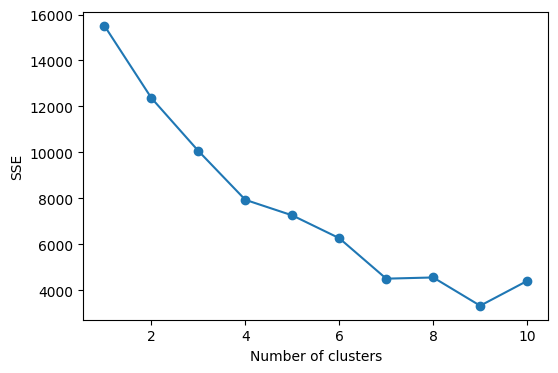

In [54]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

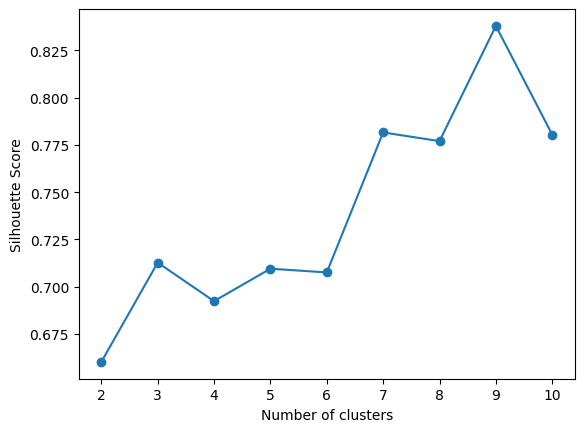

In [55]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


In [56]:
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print("The best k for your model is", kneedle.elbow)

The best k for your model is 7


Train the K-Means model on the dataset with the number of clusters you have determined.

In [57]:
kmeans = KMeans(n_clusters=9, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df_scaled)

In [58]:
# Inverse transform the scaled data to get the original values
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)

# Add the cluster labels to the original data
df_inverse['KMeans'] = y_pred

# Analyze the clusters with the original values
df_inverse.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Z_CostContact,Z_Revenue,KMeans
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,11.0,8
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0


In [59]:
silhouette_avg = silhouette_score(df_scaled, y_pred)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.8378797977817257


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [60]:
# aggregation
cluster_summary = df_inverse.groupby('KMeans').agg({
    'AcceptedCmp3': ['mean', 'min', 'max'],
    'AcceptedCmp4': ['mean', 'min', 'max'],
    'AcceptedCmp5': ['mean', 'min', 'max'],
    'AcceptedCmp1': ['mean', 'min', 'max'],
    'AcceptedCmp2': ['mean', 'min', 'max'],
    'Complain': ['mean', 'min', 'max'],
    'Z_CostContact': ['mean', 'min', 'max'],
    'Z_Revenue': ['mean', 'min', 'max'],
    'Response': ['mean', 'min', 'max']
})

cluster_summary = cluster_summary.T
cluster_summary.columns = [f'Cluster {i}' for i in range(cluster_summary.shape[1])]
cluster_summary.columns.name = 'KMeans'

cluster_summary

KMeans              Cluster 0  Cluster 1  Cluster 2  Cluster 3  Cluster 4  \
AcceptedCmp3  mean   0.000000   0.000000   1.000000   0.000000      0.875   
              min    0.000000   0.000000   1.000000   0.000000      0.000   
              max    0.000000   0.000000   1.000000   0.000000      1.000   
AcceptedCmp4  mean   0.000000   1.000000   0.000000   1.000000      0.000   
              min    0.000000   1.000000   0.000000   1.000000      0.000   
              max    0.000000   1.000000   0.000000   1.000000      0.000   
AcceptedCmp5  mean   0.023299   0.330986   0.037594   0.545455      0.625   
              min    0.000000   0.000000   0.000000   0.000000      0.000   
              max    1.000000   1.000000   1.000000   1.000000      1.000   
AcceptedCmp1  mean   0.000000   0.246479   0.000000   0.454545      0.375   
              min    0.000000   0.000000   0.000000   0.000000      0.000   
              max    0.000000   1.000000   0.000000   1.000000      1.000   
AcceptedCmp2  mean   0.000000   0.000000   0.000000   1.000000      1.000   
              min    0.000000   0.000000   0.000000   1.000000      1.000   
              max    0.000000   0.000000   0.000000   1.000000      1.000   
Complain      mean   0.000000   0.000000   0.000000   0.000000      0.000   
              min    0.000000   0.000000   0.000000   0.000000      0.000   
              max    0.000000   0.000000   0.000000   0.000000      0.000   
Z_CostContact mean   3.000000   3.000000   3.000000   3.000000      3.000   
              min    3.000000   3.000000   3.000000   3.000000      3.000   
              max    3.000000   3.000000   3.000000   3.000000      3.000   
Z_Revenue     mean  11.000000  11.000000  11.000000  11.000000     11.000   
              min   11.000000  11.000000  11.000000  11.000000     11.000   
              max   11.000000  11.000000  11.000000  11.000000     11.000   
Response      mean   0.000000   0.338028   0.413534   0.636364      0.750   
              min    0.000000   0.000000   0.000000   0.000000      0.000   
              max    0.000000   1.000000   1.000000   1.000000      1.000   

KMeans              Cluster 5  Cluster 6  Cluster 7  Cluster 8  
AcceptedCmp3  mean   0.000000        1.0   0.223404   0.000000  
              min    0.000000        1.0   0.000000   0.000000  
              max    0.000000        1.0   1.000000   0.000000  
AcceptedCmp4  mean   0.000000        0.0   0.000000   0.000000  
              min    0.000000        0.0   0.000000   0.000000  
              max    0.000000        0.0   0.000000   0.000000  
AcceptedCmp5  mean   0.000000        0.5   0.361702   0.121212  
              min    0.000000        0.0   0.000000   0.000000  
              max    0.000000        1.0   1.000000   1.000000  
AcceptedCmp1  mean   0.000000        0.0   1.000000   0.000000  
              min    0.000000        0.0   1.000000   0.000000  
              max    0.000000        0.0   1.000000   0.000000  
AcceptedCmp2  mean   0.000000        0.0   0.000000   0.000000  
              min    0.000000        0.0   0.000000   0.000000  
              max    0.000000        0.0   0.000000   0.000000  
Complain      mean   1.000000        1.0   0.000000   0.000000  
              min    1.000000        1.0   0.000000   0.000000  
              max    1.000000        1.0   0.000000   0.000000  
Z_CostContact mean   3.000000        3.0   3.000000   3.000000  
              min    3.000000        3.0   3.000000   3.000000  
              max    3.000000        3.0   3.000000   3.000000  
Z_Revenue     mean  11.000000       11.0  11.000000  11.000000  
              min   11.000000       11.0  11.000000  11.000000  
              max   11.000000       11.0  11.000000  11.000000  
Response      mean   0.052632        1.0   0.446809   1.000000  
              min    0.000000        1.0   0.000000   1.000000  
              max    1.000000        1.0   1.000000   1.000000

In [61]:
# count data from each cluster
cluster_count = df_inverse['KMeans'].value_counts().sort_index()
cluster_count.name = 'KMeans'
cluster_count

,KMeans
KMeans,
0,1631
1,142
2,133
3,22
4,8
5,19
6,2
7,94
8,165


In [62]:
# write down your interpretation from the cluster that you have been made

# 1. Cluster 0 - Inactive Customers
# These customers are not responsive to any of the campaigns and show no engagement. They might need targeted outreach to increase interest.

# 2. Cluster 1 - Selective Campaign Responders
# Customers in this cluster responded mainly to Campaign 4. They show moderate engagement, but their response is selective.

# 3. Cluster 2 - Loyal Campaign 3 Responders
# This group is highly engaged with Campaign 3. They respond to promotions but are less likely to engage with other campaigns.

# 4. Cluster 3 - High Responders Across Campaigns
# Customers here respond well to multiple campaigns, especially Campaign 4. They are highly engaged and show the strongest overall response.

# 5. Cluster 4 - Loyal and High Responding Customers
# This group is very loyal, responding strongly to Campaigns 2 and 5. They are highly engaged and show no complaints.

# 6. Cluster 5 - Complaining Customers
# These customers have a history of complaints and show little engagement with the campaigns. They may need attention to address their concerns.

# 7. Cluster 6 - Fully Engaged Customers
# This group is highly engaged with all campaigns and shows excellent response rates. They are the most valuable customers.

# 8. Cluster 7 - Moderate Engagement
# Customers here have mixed responses, showing moderate engagement with certain campaigns. They need more targeted offers to increase their loyalty.

# 9. Cluster 8 - High Responders to Campaigns
# Customers in this cluster are highly engaged, especially with Campaign 5 and 4. They respond well to promotions and are likely loyal.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

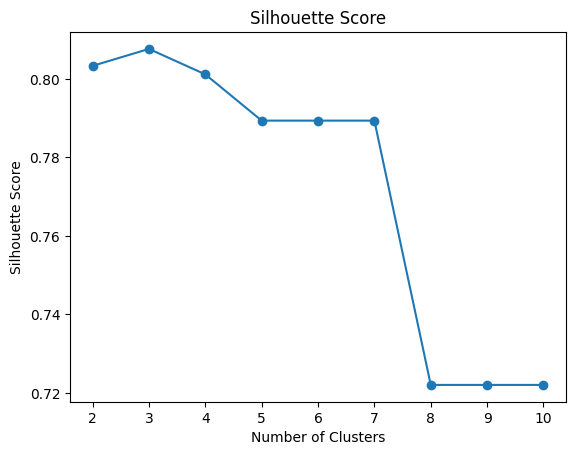

In [63]:
silhouette_scores = []
for i in range(2, 11):
    hierarchical = fcluster(linkage(df_scaled, method='single'), i, criterion='maxclust')
    silhouette_avg = silhouette_score(df_scaled, hierarchical)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [64]:
# agglomerative clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
y_pred_hc = hc.fit_predict(df_scaled)

In [65]:
# Add the cluster labels to the original data that you have added with kmeans so you have a full dataframe including kmeans and agglo clustering
df_inverse = pd.DataFrame(scaler.inverse_transform(df_scaled), columns=df_scaled.columns)
df_inverse['KMeans'] = y_pred
df_inverse['Agglo'] = y_pred_hc

# show the df
df_inverse.head()

,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Z_CostContact,Z_Revenue,KMeans,Agglo
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,11.0,8,2
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0,2


In [66]:
silhouette_avg_hc = silhouette_score(df_scaled, y_pred_hc)
print("Silhouette Score:", silhouette_avg_hc)

Silhouette Score: 0.8076479518983672


Display the cluster summary in the form of a dataframe.

In [67]:
# aggregation
cluster_summary = df_inverse.groupby('Agglo').agg({
    'AcceptedCmp3': ['mean', 'min', 'max'],
    'AcceptedCmp4': ['mean', 'min', 'max'],
    'AcceptedCmp5': ['mean', 'min', 'max'],
    'AcceptedCmp1': ['mean', 'min', 'max'],
    'AcceptedCmp2': ['mean', 'min', 'max']
})

cluster_summary

AcceptedCmp3           AcceptedCmp4           AcceptedCmp5            \
              mean  min  max         mean  min  max         mean  min  max   
Agglo                                                                        
0         0.233333  0.0  1.0     0.733333  0.0  1.0     0.566667  0.0  1.0   
1         0.095238  0.0  1.0     0.000000  0.0  0.0     0.047619  0.0  1.0   
2         0.071132  0.0  1.0     0.065589  0.0  1.0     0.066513  0.0  1.0   

      AcceptedCmp1           AcceptedCmp2            
              mean  min  max         mean  min  max  
Agglo                                                
0         0.433333  0.0  1.0          1.0  1.0  1.0  
1         0.000000  0.0  0.0          0.0  0.0  0.0  
2         0.059584  0.0  1.0          0.0  0.0  0.0

In [68]:
# aggregation
cluster_summary = df_inverse.groupby('Agglo').agg({
    'Complain': ['mean', 'min', 'max'],
    'Z_CostContact': ['mean', 'min', 'max'],
    'Z_Revenue': ['mean', 'min', 'max'],
    'Response': ['mean', 'min', 'max']
})

cluster_summary

Complain           Z_CostContact           Z_Revenue              \
          mean  min  max          mean  min  max      mean   min   max   
Agglo                                                                    
0          0.0  0.0  0.0           3.0  3.0  3.0      11.0  11.0  11.0   
1          1.0  1.0  1.0           3.0  3.0  3.0      11.0  11.0  11.0   
2          0.0  0.0  0.0           3.0  3.0  3.0      11.0  11.0  11.0   

       Response            
           mean  min  max  
Agglo                      
0      0.666667  0.0  1.0  
1      0.142857  0.0  1.0  
2      0.143187  0.0  1.0

In [69]:
# count data from each cluster
cluster_counts = df_inverse['Agglo'].value_counts().sort_index()
cluster_counts.name = 'Agglo'
cluster_counts

,Agglo
Agglo,
0,30
1,21
2,2165


In [70]:
# write down your interpretation from the cluster that you have been made

# 1. Cluster 0 - Highly Engaged and Responsive Customers
# Cluster 0 consists of highly engaged customers who respond strongly to campaigns like AcceptedCmp4 and AcceptedCmp2, with no complaints and a relatively high response rate. They are likely to be loyal customers who actively participate in promotions.

# 2. Cluster 1 - Low Engagement and Dissatisfied Customers
# Cluster 1 represents customers with low campaign engagement, showing minimal interest in promotions, as indicated by low response rates. They have complaints, suggesting dissatisfaction with their shopping experience, and they are less responsive to marketing efforts.

# 3. Cluster 2 - Moderately Engaged but Less Responsive Customers
# Cluster 2 comprises customers with moderate campaign engagement but low response rates. While they do not have complaints, they show limited responsiveness to promotional efforts, indicating they may need more targeted or incentivized offers to increase engagement.

**Hierarchical Visualization**

Single Linkage

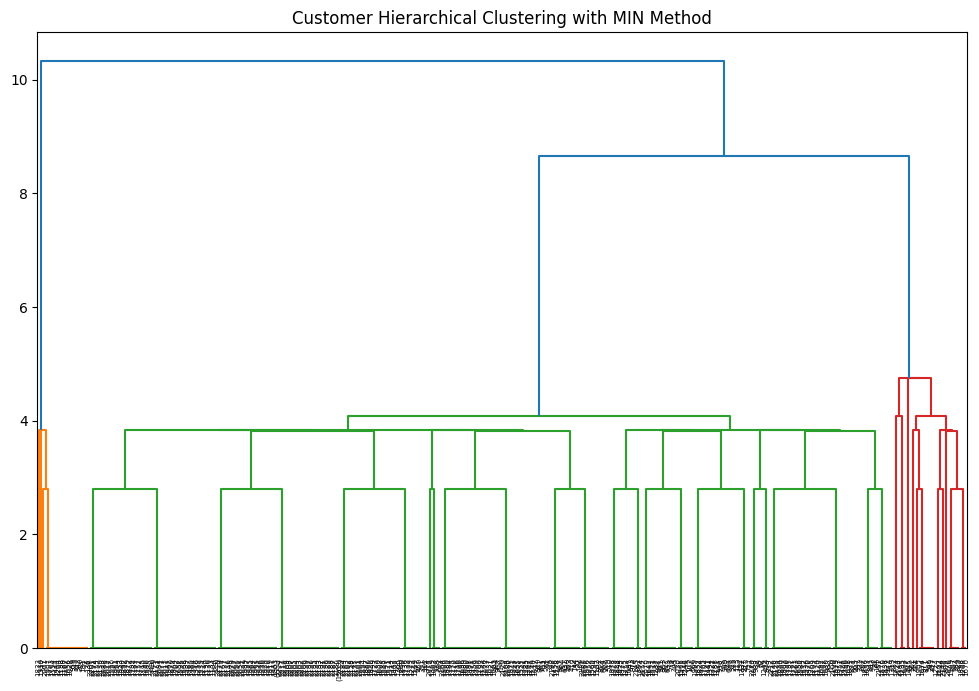

In [71]:
# Perform hierarchical clustering using single linkage
linked = linkage(df_scaled, method='single')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='level', orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Customer Hierarchical Clustering with MIN Method')
plt.show()

complete linkage

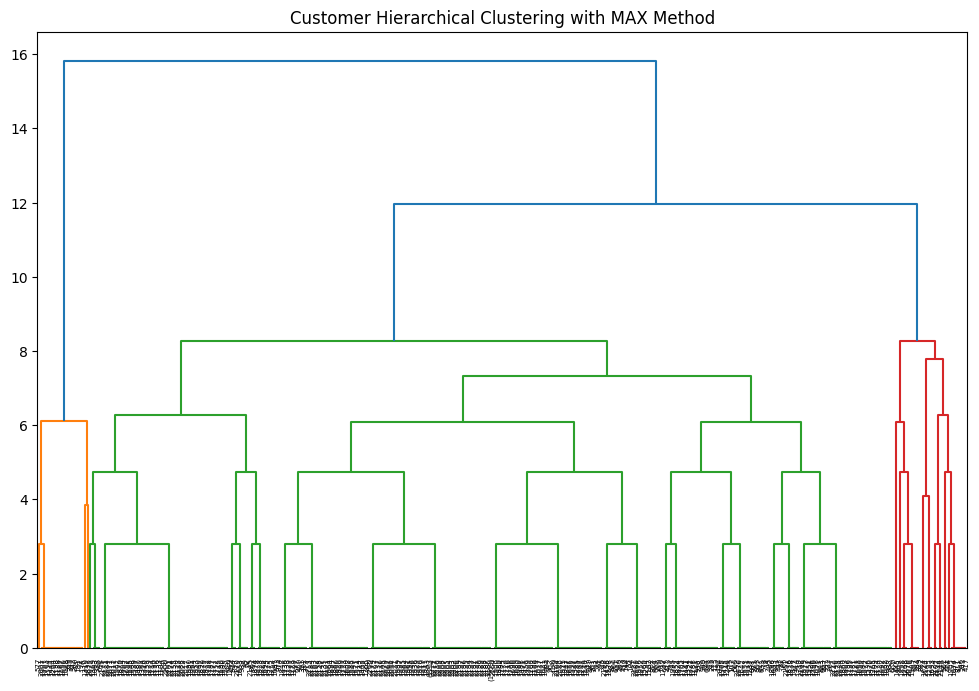

In [72]:
# Perform hierarchical clustering using complete linkage
linked = linkage(df_scaled, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='level', orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Customer Hierarchical Clustering with MAX Method')
plt.show()

average linkage

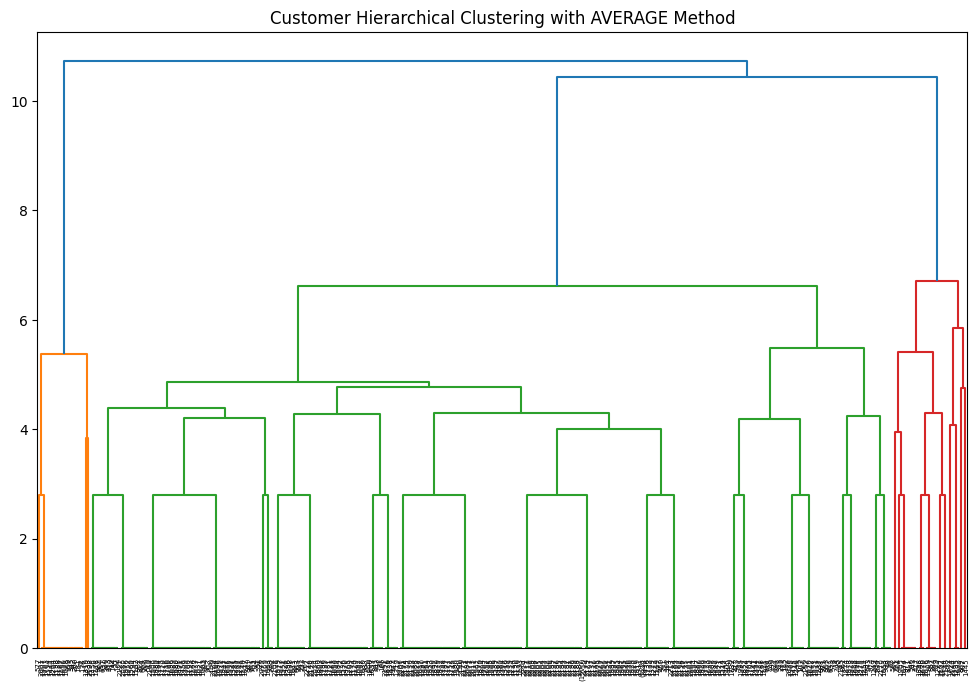

In [73]:
# Perform hierarchical clustering using average linkage
linked = linkage(df_scaled, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='level', orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Customer Hierarchical Clustering with AVERAGE Method')
plt.show()

ward linkage

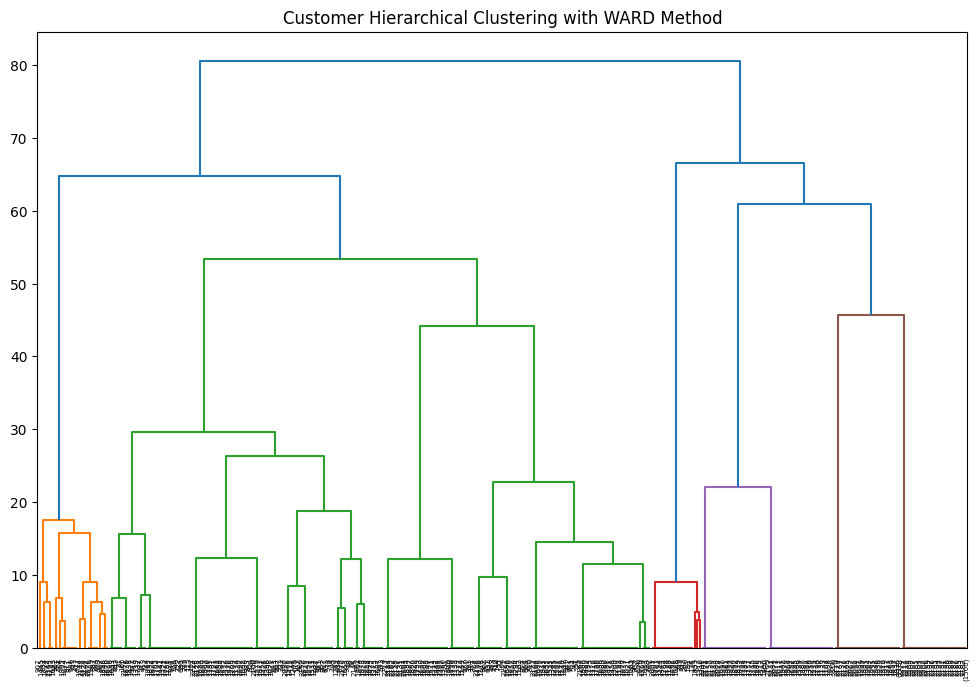

In [74]:
# Perform hierarchical clustering using ward linkage
linked = linkage(df_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked, truncate_mode='level', orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Customer Hierarchical Clustering with WARD Method')
plt.show()